In [6]:
import librosa
import librosa.display
from IPython.display import Audio
import IPython.display as ipd

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [7]:
#load audio files
audio_file = "/content/drive/My Drive/samsung_dataset/CleanSpeech_training/clnsp1.wav"
Audio(audio_file,autoplay=True)

In [ ]:
#sr - sample rate - number of samples per second.
audio, sr = librosa.load(audio_file)

In [ ]:
audio

array([-0.00351115, -0.00551955, -0.00539351, ..., -0.01198402,
       -0.00621568,  0.        ], dtype=float32)

In [ ]:
audio.size

297946

In [ ]:
#duration of 1 sample
sample_duration = 1 / sr
print("Duration of 1 sample is : ",sample_duration," in seconds")


Duration of 1 sample is :  4.5351473922902495e-05  in seconds


In [ ]:
#duration of the audio signal in seconds
duration = sample_duration * len(audio)
print("Duration of signal is : ", duration," in seconds")

Duration of signal is :  13.512290249433107  in seconds


Text(0.5, 1.0, 'audio')

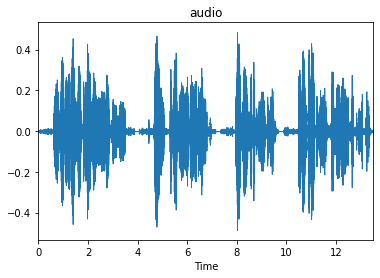

In [ ]:
#visualize the waveform 
import matplotlib.pyplot as plt
# plt.figure(figsize=(15,17))
librosa.display.waveplot(audio)
plt.title("audio")

In [ ]:
import numpy as np
FRAME_SIZE = 1024
#calculate the amplitude envelope
def amplitude_envelope(signal, frame_size):
  amplitude_envelope = []
  size = len(signal)
  #calculate AE for each frame
  for i in range(0,size,frame_size):
    current_frame_amplitude_envelope = max(signal[i:i+frame_size])
    amplitude_envelope.append(current_frame_amplitude_envelope)
  return np.array(amplitude_envelope)

In [ ]:

ae_audio = amplitude_envelope(audio,FRAME_SIZE)
print(len(ae_audio))

291


In [4]:
import os
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
from IPython.display import Audio
import matplotlib.pyplot as plt


In [8]:
Audio(audio_file,autoplay=True)

In [9]:
#sr - sample rate - number of samples per second.
audio, sr = librosa.load(audio_file)

In [12]:
FRAME_SIZE = 2048
HOP_SIZE = 512 
audio_stft = librosa.stft(audio,n_fft = FRAME_SIZE, hop_length = HOP_SIZE)
audio_stft.shape

(1025, 582)

In [13]:
type(audio_stft[0][0])

numpy.complex64

In [14]:
audio_stf = np.abs(audio_stft) ** 2

In [15]:
type(audio_stf[0][0])

numpy.float32

In [39]:
def plot_spectrogram(Y,sr,hop_length,y_axis ='linear'):
  plt.figure(figsize=(20,10))
  librosa.display.specshow(Y,
                           sr=sr,
                           hop_length=hop_length,
                           x_axis='time',
                           y_axis=y_axis)
  plt.colorbar(format="%+2.f")

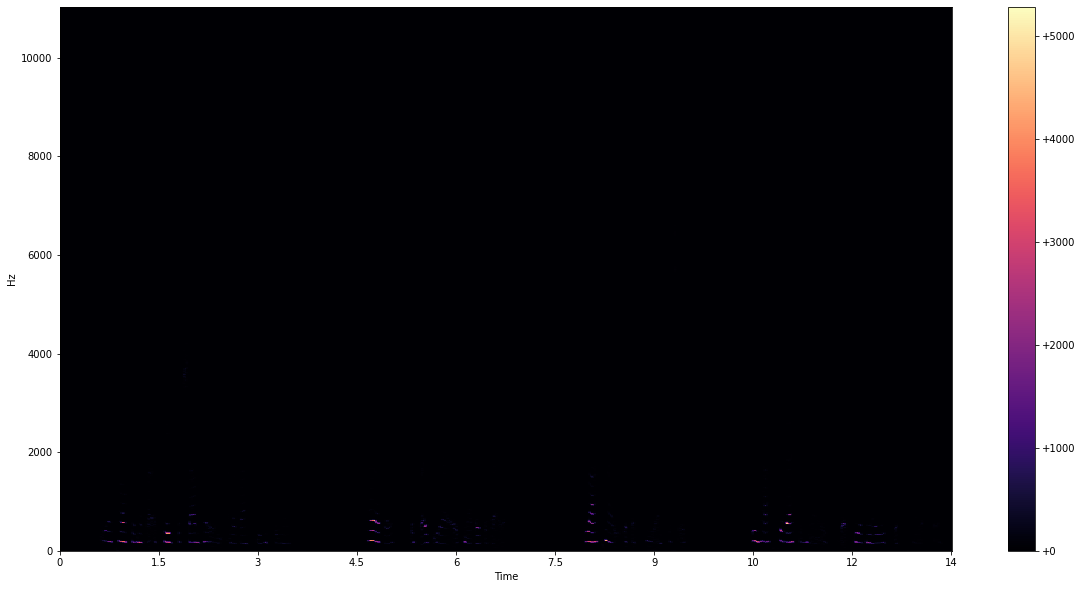

In [40]:
plot_spectrogram(audio_stf,sr,HOP_SIZE)

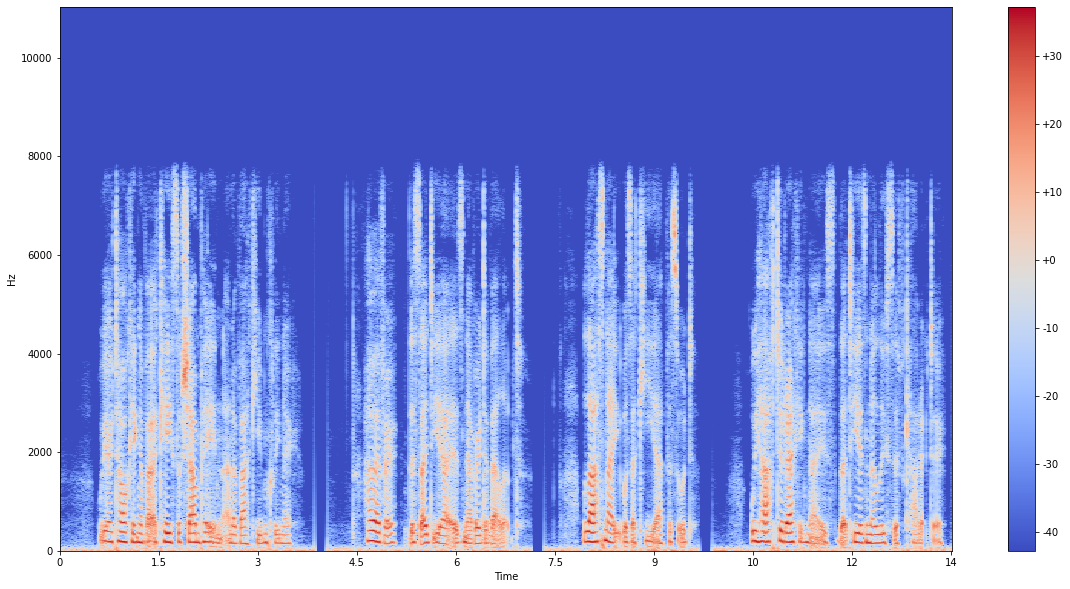

In [41]:
audio_log_scale = librosa.power_to_db(audio_stf)
plot_spectrogram(audio_log_scale,sr,HOP_SIZE)

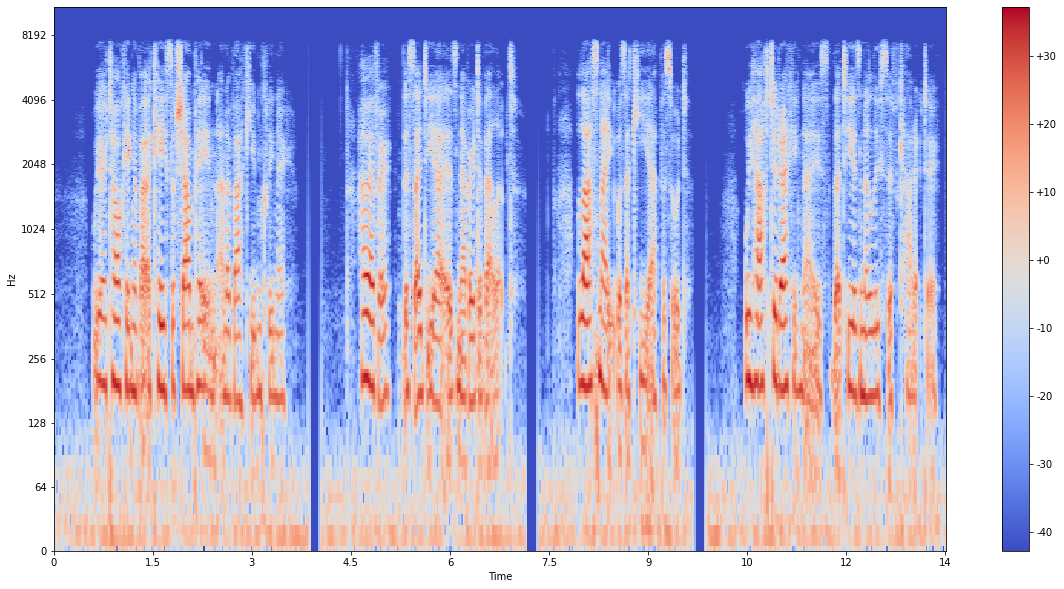

In [42]:
plot_spectrogram(audio_log_scale,sr,HOP_SIZE,y_axis='log')